## Stresstest av Fintech Enigmas Portefølje per 31.12.2024

Bruker Monte Carlo simulering ved vanlig og 100% økt volatilitet. Modellering av aksjepriser skjer ved bruk av Merton Jump-Diffusion Model, og modellering av oljeprisen brukes  Geometric Mean-Reverting model.


Black-Karasinski Model for Geometric Mean-Revering for modellering av råvarepriser (brent olje):

$ dS_t = \kappa (\mu - ln(S_t) ) S_tdt + \sigma S_t dW_t $

Kou Jump-Diffusion Modell for modellering av akjsepriser:

$ dS_t = \mu S_t dt +\sigma S_t dW_t + S_t (e^J-1)dq_t $

$ J \leftarrow f_J(i) = p \eta_1 e^{\eta_1 i } \textbf{1}_{i>0} + (1-p) \eta_2 e^{eta_2 i } \textbf{1}_{i<0} $

In [308]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy import stats
import yfinance as yf

np.random.seed()

In [252]:
T = 122 # Børsdager jan-juni
dt = 1
N = 1000 # Antall simuleringer

In [253]:
nor_tickers = [ticker + '.OL' for ticker in 'MOWI,KOG,DOFG,BNOR,SCHB,ODL,STB,SEA1'.split(',')]
sv_tickers = ['BETS-B.ST']
eu_tickers = ['GLDA.DE']
fnd_tickers = ['0P0001RFXP.IR']
tickers_yf = nor_tickers + sv_tickers + eu_tickers
tickers = [ticker.split(".")[0] for ticker in tickers_yf]

In [409]:
portfolio = {
    'MOWI': 0.07,
    'KOG': 0.06,
    'DOFG': 0.04,
    'BNOR': 0.11,
    'SCHB': 0.07,
    'ODL': 0.08,
    'STB': 0.07,
    'SEA1': 0.04,
    'BETS-B': 0.06,
    'GLDA': 0.13
}

tot = np.sum(list(portfolio.values()))

for ticker in tickers:
    portfolio[ticker] = portfolio[ticker] / tot

portfolio

{'MOWI': 0.0958904109589041,
 'KOG': 0.08219178082191779,
 'DOFG': 0.0547945205479452,
 'BNOR': 0.1506849315068493,
 'SCHB': 0.0958904109589041,
 'ODL': 0.1095890410958904,
 'STB': 0.0958904109589041,
 'SEA1': 0.0547945205479452,
 'BETS-B': 0.08219178082191779,
 'GLDA': 0.1780821917808219}

In [255]:
df = pd.DataFrame()

for (i, ticker) in enumerate(tickers_yf):
    data = yf.download(ticker, start='2024-01-01', end='2024-12-31', period='1d')
    data = pd.DataFrame(data)
    data.reset_index(inplace=True)
    if i == 0:
        df['Date'] = data['Date']
    df[ticker.split(".")[0]] = data['Close']  

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [256]:
import requests

# URL for the GET request
url = "https://api.e24.no/bors/chart/SEA1.OSE?period=1years&type=stock&withVolume=true"
prices = []

# Perform the GET request
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    # Parse JSON response
    data = response.json()

    # Convert to DataFrame
    prices = [x[1] for x in data['data'][:-12]]
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


In [257]:
prev_prices = [26.65, 26.85, 26.4, 26.25, 25.8, 25.5, 25.2, 25, 26.15, 25.3, 25, 24.95, 24.65, 25.0]

prices = prev_prices + prices

df['SEA1'] = prices

df

,Date,MOWI,KOG,DOFG,BNOR,SCHB,ODL,STB,SEA1,BETS-B,GLDA
0,2024-01-02,183.350006,471.000000,57.630001,516.0,271.200012,39.650002,91.320000,26.65,108.599998,74.919998
1,2024-01-03,185.600006,470.799988,57.599998,518.0,271.200012,39.150002,91.000000,26.85,107.099998,74.055000
2,2024-01-04,188.800003,482.799988,57.200001,521.0,273.000000,39.099998,91.419998,26.40,108.300003,74.160004
3,2024-01-05,188.699997,483.200012,57.500000,524.0,269.799988,39.299999,91.279999,26.25,107.099998,74.334999
4,2024-01-08,188.399994,481.799988,55.799999,505.0,275.000000,37.950001,91.480003,25.80,109.300003,73.605003
...,...,...,...,...,...,...,...,...,...,...,...
245,2024-12-19,196.000000,1293.000000,81.099998,617.0,333.399994,50.299999,121.099998,24.10,140.779999,100.650002
246,2024-12-20,195.449997,1269.000000,82.400002,616.0,328.000000,49.599998,120.000000,24.15,140.679993,100.199997
247,2024-12-23,194.449997,1291.000000,84.000000,621.0,329.200012,50.099998,120.099998,24.35,141.740005,99.760002
248,2024-12-27,195.699997,1294.000000,84.000000,644.0,333.000000,50.799999,121.800003,24.35,138.860001,99.980003


### Estimering av parametre for aksjepriser til Kou Jump-Diffusion Modellen

In [373]:
params = {}

for ticker in tickers:
    S_t = np.array(df[ticker])
    log_rt = np.array([np.log(S_t[i]/S_t[i-1]) for i in range(1, len(S_t))])
    sd = np.std(log_rt)
    trsht = 3*sd # 

    jumps = log_rt[np.abs(log_rt) > trsht]
    diff = log_rt[np.abs(log_rt) <= trsht]

    mu = np.mean(diff)
    sigma = np.std(diff)

    l_jump = len(jumps) / len(log_rt)

    u_jumps = jumps[jumps > 0]
    d_jumps = jumps[jumps < 0]
    p = len(u_jumps) / len(jumps)

    eta_1 = 1 / np.mean(u_jumps) if len(u_jumps) > 0 else np.inf
    eta_2 = 1 / np.mean(np.abs(d_jumps)) if len(d_jumps) > 0 else np.inf

    params[f'{ticker}:mu'] = mu
    params[f'{ticker}:sigma'] = sigma
    params[f'{ticker}:l_jump'] = l_jump
    params[f'{ticker}:p'] = p
    params[f'{ticker}:eta_1'] = eta_1*100
    params[f'{ticker}:eta_2'] = eta_2*100

params = pd.DataFrame([params])
params

,MOWI:mu,MOWI:sigma,MOWI:l_jump,MOWI:p,MOWI:eta_1,MOWI:eta_2,KOG:mu,KOG:sigma,KOG:l_jump,KOG:p,...,BETS-B:l_jump,BETS-B:p,BETS-B:eta_1,BETS-B:eta_2,GLDA:mu,GLDA:sigma,GLDA:l_jump,GLDA:p,GLDA:eta_1,GLDA:eta_2
0,0.00012,0.010963,0.012048,0.666667,2658.637058,2253.77307,0.00357,0.01677,0.012048,0.666667,...,0.012048,0.666667,958.236414,825.077014,0.001254,0.008159,0.012048,0.333333,3205.740087,3376.606673


In [291]:
corr_mtx = df[tickers]
corr_mtx = corr_mtx.corr()
corr_mtx

,MOWI,KOG,DOFG,BNOR,SCHB,ODL,STB,SEA1,BETS-B,GLDA
MOWI,1.000000,0.023560,-0.426533,0.448805,0.496773,-0.405649,0.063972,0.011251,-0.033006,0.082242
KOG,0.023560,1.000000,0.734275,0.127318,0.556540,0.652623,0.908157,-0.178362,0.876936,0.930466
DOFG,-0.426533,0.734275,1.000000,-0.084462,0.124189,0.921142,0.645245,0.193811,0.592779,0.626442
BNOR,0.448805,0.127318,-0.084462,1.000000,0.475574,0.097313,0.076470,0.309632,0.093994,0.229190
SCHB,0.496773,0.556540,0.124189,0.475574,1.000000,0.152927,0.602633,-0.041224,0.583664,0.674351
ODL,-0.405649,0.652623,0.921142,0.097313,0.152927,1.000000,0.587096,0.319312,0.485463,0.596743
STB,0.063972,0.908157,0.645245,0.076470,0.602633,0.587096,1.000000,-0.252210,0.874433,0.922592
SEA1,0.011251,-0.178362,0.193811,0.309632,-0.041224,0.319312,-0.252210,1.000000,-0.352771,-0.136911
BETS-B,-0.033006,0.876936,0.592779,0.093994,0.583664,0.485463,0.874433,-0.352771,1.000000,0.842293
GLDA,0.082242,0.930466,0.626442,0.229190,0.674351,0.596743,0.922592,-0.136911,0.842293,1.000000


### Estimering av parametre av brent oilje pris til Black-Karasinski Modellen

Skriver om til diskret verskjon 

$ X_t = ln(S_t) $

$ \Delta X_t = \kappa (\mu - X_t) \Delta t + \sigma \sqrt{\Delta t} W_t $

In [292]:
crude = yf.download('BZ=F', '2024-01-01', '2024-12-31', period='1d')
crude = pd.DataFrame(crude)
crude.reset_index(inplace=True)
crude = crude[['Date', 'Close']]
crude.head(10)

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2024-01-02,75.889999
1,2024-01-03,78.250000
2,2024-01-04,77.589996
3,2024-01-05,78.760002
4,2024-01-08,76.120003
5,2024-01-09,77.589996
6,2024-01-10,76.800003
7,2024-01-11,77.410004
8,2024-01-12,78.290001
9,2024-01-16,78.290001


In [293]:
X = np.log(crude['Close'])

dX = np.diff(X)  # ΔX_t
X_lag = X[:-1]   # X_t

# Step 2: Perform OLS regression to estimate A and B
X_lag = sm.add_constant(X_lag)  # Add intercept term
model = sm.OLS(dX, X_lag).fit()
A, B = model.params

kappa = -B / dt/T
mu = A / B / 100

residuals = model.resid
sigma = np.std(residuals) / np.sqrt(dt)

crude_params = {'mu': mu, 'kappa': kappa, 'sigma': sigma}
crude_params

{'mu': -0.04375353542929924,
 'kappa': 0.00024290314497686714,
 'sigma': 0.016595208326817764}

In [294]:
df_w_crude = df.copy()
df_w_crude = pd.merge(df_w_crude, how='left', on='Date', right=crude)

df_w_crude['Crude'] = df_w_crude['Close']
del df_w_crude['Close']

df_w_crude_corr = df_w_crude.corr()

crude_corr = {}

for ticker in tickers:
    crude_corr[ticker] = df_w_crude_corr[ticker]['Crude']

crude_corr = pd.DataFrame([crude_corr])
crude_corr

,MOWI,KOG,DOFG,BNOR,SCHB,ODL,STB,SEA1,BETS-B,GLDA
0,-0.14229,-0.591908,-0.1564,0.291682,-0.328524,0.022726,-0.654707,0.685751,-0.661852,-0.557867


## Monte Carlo Simulering av Portefølje gitt standard parametre

In [566]:
paths = {ticker: np.zeros((N, T)) for ticker in tickers}

for ticker in tickers:
    paths[ticker][:, 0] = df.iloc[-1][ticker]

for t in range(1, T):
    Z = np.random.normal(size=(N, len(tickers)))
    L = np.linalg.cholesky(corr_mtx)
    Z = np.dot(L, Z.T).T

    for i, ticker in enumerate(tickers):
        dW = np.sqrt(dt) * Z[:, i]

        # Vectorized jump sizes
        upward_jumps = np.random.poisson(params[f'{ticker}:l_jump'] * params[f'{ticker}:p'] * dt, N)
        downward_jumps = np.random.poisson(params[f'{ticker}:l_jump'] * (1 - params[f'{ticker}:p']) * dt, N)
        jump_sizes = (
            upward_jumps * np.random.exponential(1/params[f'{ticker}:eta_1'], N)
            - downward_jumps * np.random.exponential(1/params[f'{ticker}:eta_2'], N)
        )

        W = 1 + float(params[f'{ticker}:mu']) * dt + float(params[f'{ticker}:sigma']) * dW + jump_sizes 

        # Update stock price
        paths[ticker][:, t] = np.array(paths[ticker][:, t-1]) * W

C:\Users\naths\AppData\Local\Temp\ipykernel_27028\2224706948.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  W = 1 + float(params[f'{ticker}:mu']) * dt + float(params[f'{ticker}:sigma']) * dW + jump_sizes


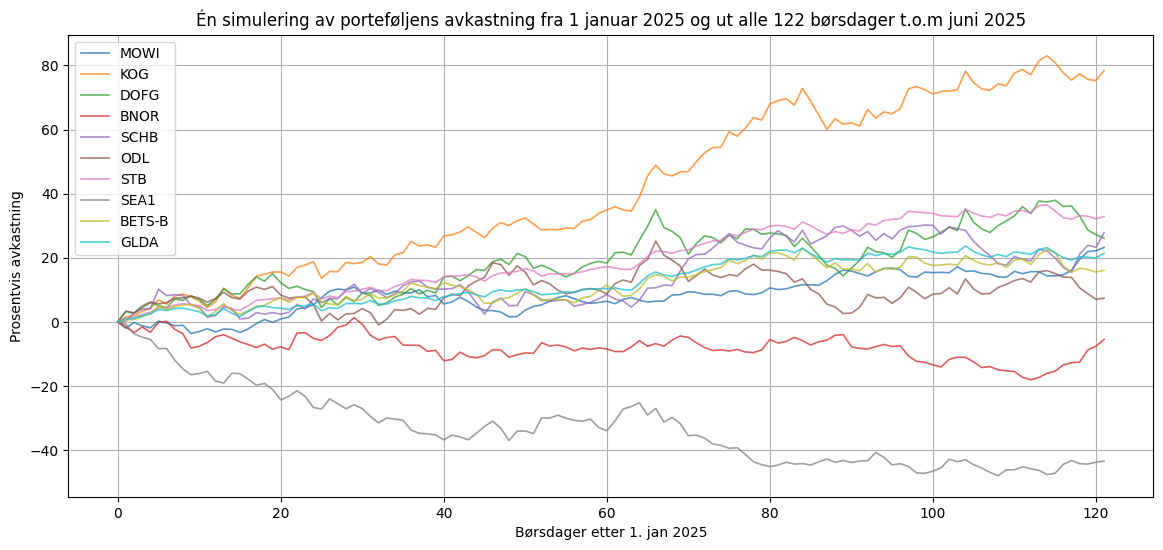

In [452]:
time = range(T)
i = 100
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(time, 100*(paths[ticker][i]/paths[ticker][i][0] - 1), label=ticker, lw=1.2, alpha=0.75)

plt.legend()
plt.title("Én simulering av porteføljens avkastning fra 1 januar 2025 og ut alle 122 børsdager t.o.m juni 2025")
plt.grid()
plt.xlabel("Børsdager etter 1. jan 2025")
plt.ylabel("Prosentvis avkastning")
plt.show()

#### VaR analyse av simuleringen

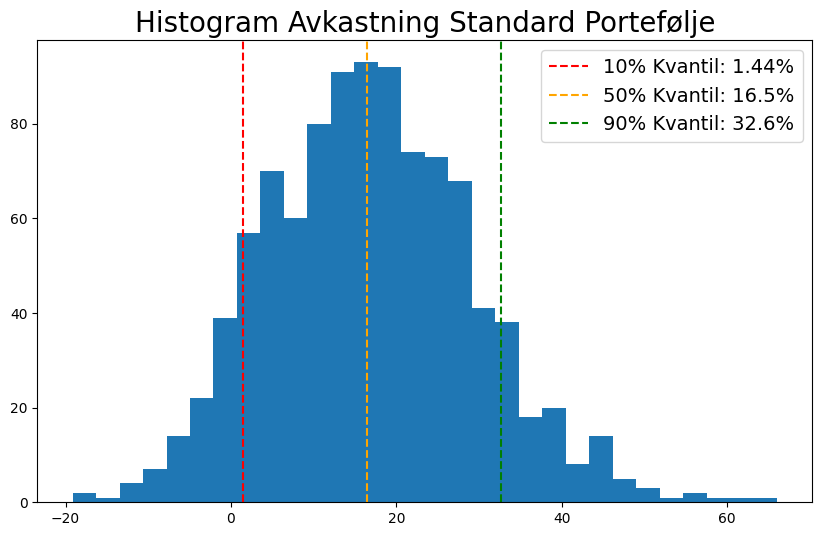

UPI: 1.8352167470521017


In [504]:
avkastninger = {ticker: np.zeros(N) for ticker in tickers}

for ticker in tickers:
    r = 100*(paths[ticker][:, T-1] / paths[ticker][:, 0] - 1)
    avkastninger[ticker] = r

avkastninger_portfolio = []

for i in range(N):
    avkast = 0
    for ticker in tickers:
        avkast += avkastninger[ticker][i] * portfolio[ticker]

    avkastninger_portfolio.append(avkast)

mu_r = np.mean(avkastninger_portfolio)
sd_r = np.sqrt(np.var(avkastninger_portfolio))
_10q = np.sort(avkastninger_portfolio)[int((N-1)*0.1 + 1)]
_90q = np.sort(avkastninger_portfolio)[int((N-1)*0.9 + 1)]
_50q = np.sort(avkastninger_portfolio)[int((N-1)*0.5 + 1)]

plt.figure(figsize=(10, 6))
plt.hist(avkastninger_portfolio, 30)
plt.title("Histogram Avkastning Standard Portefølje", fontsize=20)
plt.axvline(_10q, color="red", linestyle="--", label=f"10% Kvantil: {round(_10q, 2)}%")
plt.axvline(_50q, color="orange", linestyle="--", label=f"50% Kvantil: {round(_50q, 2)}%")
plt.axvline(_90q, color="green", linestyle="--", label=f"90% Kvantil: {round(_90q, 2)}%")
plt.legend(fontsize=14)

plt.show()
print(f'UPI: {( _90q - abs(_10q))/mu_r}')

## Monte Carlo Simulering av Portefølje gitt økende volatilitet opp til 100% økning 

$ \Delta \sigma \leftarrow N( \sqrt[T]{20}-1 , \frac{\sqrt[T]{20}-1}{4} ) $

In [516]:
paths = {ticker: np.zeros((N, T)) for ticker in tickers}

d_sigma = np.power(2, 1/T) - 1
sigma_sigma = (d_sigma) / 4

for ticker in tickers:
    paths[ticker][:, 0] = df.iloc[-1][ticker]

for t in range(1, T):
    Z = np.random.normal(size=(N, len(tickers))) * np.exp(np.random.normal(d_sigma, sigma_sigma) * t)
    L = np.linalg.cholesky(corr_mtx)
    Z = np.dot(L, Z.T).T

    for i, ticker in enumerate(tickers):
        dW = np.sqrt(dt) * Z[:, i]

        # Vectorized jump sizes
        upward_jumps = np.random.poisson(params[f'{ticker}:l_jump'] * params[f'{ticker}:p'] * dt, N)
        downward_jumps = np.random.poisson(params[f'{ticker}:l_jump'] * (1 - params[f'{ticker}:p']) * dt, N)
        jump_sizes = (
            upward_jumps * np.random.exponential(1/params[f'{ticker}:eta_1'], N)
            - downward_jumps * np.random.exponential(1/params[f'{ticker}:eta_2'], N)
        )

        W = 1 + float(params[f'{ticker}:mu']) * dt + float(params[f'{ticker}:sigma']) * dW + jump_sizes 

        # Update stock price
        paths[ticker][:, t] = np.array(paths[ticker][:, t-1]) * W

C:\Users\naths\AppData\Local\Temp\ipykernel_27028\1636712651.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  W = 1 + float(params[f'{ticker}:mu']) * dt + float(params[f'{ticker}:sigma']) * dW + jump_sizes


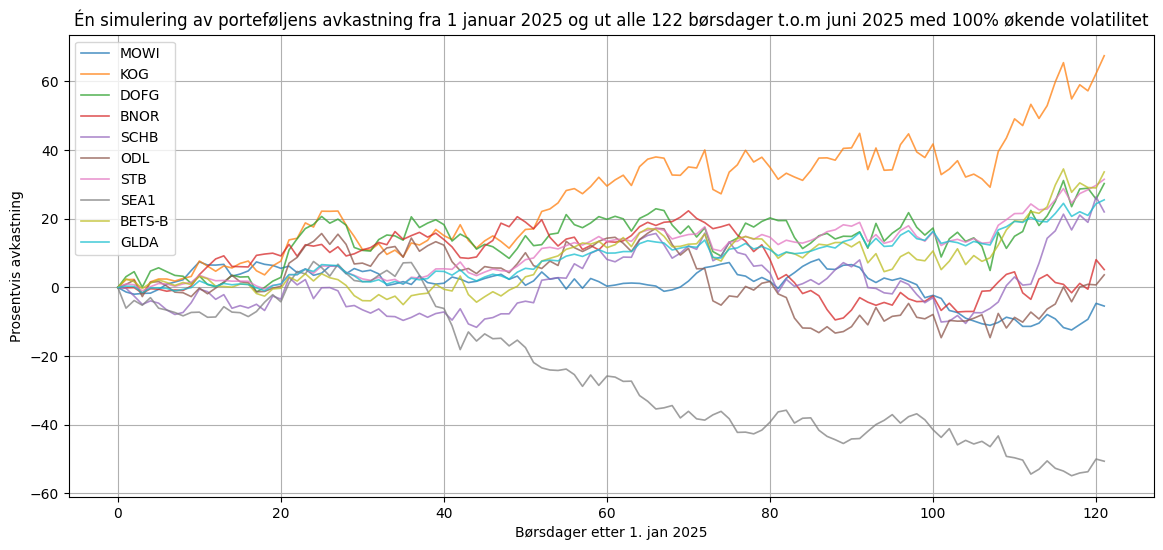

In [456]:
time = range(T)
i = 179
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(time, 100*(paths[ticker][i]/paths[ticker][i][0] - 1), label=ticker, lw=1.2, alpha=0.75)

plt.legend()
plt.title(f'Én simulering av porteføljens avkastning fra 1 januar 2025 og ut alle 122 børsdager t.o.m juni 2025 med 100% økende volatilitet')
plt.grid()
plt.xlabel("Børsdager etter 1. jan 2025")
plt.ylabel("Prosentvis avkastning")
plt.show()

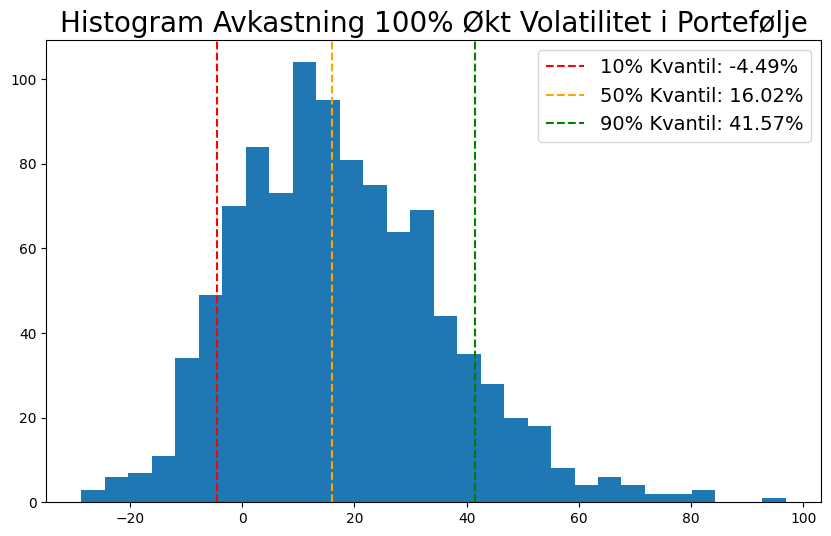

UPI: 2.0961803837117325


In [517]:
avkastninger = {ticker: np.zeros(N) for ticker in tickers}

for ticker in tickers:
    r = 100*(paths[ticker][:, T-1] / paths[ticker][:, 0] - 1)
    avkastninger[ticker] = r

avkastninger_portfolio = []

for i in range(N):
    avkast = 0
    for ticker in tickers:
        avkast += avkastninger[ticker][i] * portfolio[ticker]

    avkastninger_portfolio.append(avkast)

mu_r = np.mean(avkastninger_portfolio)
sd_r = np.sqrt(np.var(avkastninger_portfolio))
_10q = np.sort(avkastninger_portfolio)[int((N-1)*0.1 + 1)]
_90q = np.sort(avkastninger_portfolio)[int((N-1)*0.9 + 1)]
_50q = np.sort(avkastninger_portfolio)[int((N-1)*0.5 + 1)]

plt.figure(figsize=(10, 6))
plt.hist(avkastninger_portfolio, 30)
plt.title("Histogram Avkastning 100% Økt Volatilitet i Portefølje", fontsize=20)
plt.axvline(_10q, color="red", linestyle="--", label=f"10% Kvantil: {round(_10q, 2)}%")
plt.axvline(_50q, color="orange", linestyle="--", label=f"50% Kvantil: {round(_50q, 2)}%")
plt.axvline(_90q, color="green", linestyle="--", label=f"90% Kvantil: {round(_90q, 2)}%")
plt.legend(fontsize=14)

plt.show()
print(f'UPI: {( _90q - abs(_10q))/mu_r}')

## Monte Carlo Simulering av Porteføljen gitt oljeprisens bevegelse

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


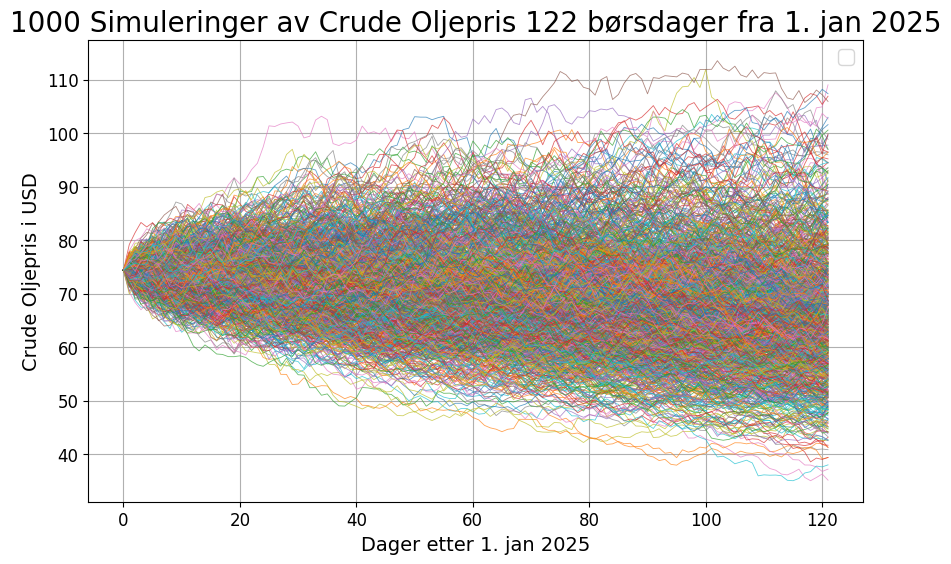

In [590]:
C_t = np.zeros((N,T))
C_t[:, 0] = np.log(crude.iloc[-1]['Close'])

for t in range(1, T):
    Z = np.random.normal(size=N)
    dW = np.sqrt(dt)*Z
    

    dX = float(crude_params['kappa']) * (float(crude_params['mu']) - C_t[:, t-1]) * dt + float(crude_params['sigma']) * dW
    C_t[:, t] = C_t[:, t-1] + dX


average_price = np.exp(C_t).mean(axis=0)


plt.figure(figsize=(10, 6))
for n in range(N):
    plt.plot(time, np.exp(C_t[n]), lw=0.6, alpha=0.7)

# plt.plot(time, average_price, color='red', lw=2.5, label=f'Gjennomsnittlig Pris, \n Avkastning: {np.round(100*(average_price[-1] / average_price[0] - 1), 1)}%')
plt.title("1000 Simuleringer av Crude Oljepris 122 børsdager fra 1. jan 2025", fontsize=20)
plt.grid()
plt.xlabel("Dager etter 1. jan 2025", fontsize=14)
plt.ylabel("Crude Oljepris i USD", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

In [530]:
paths = {ticker: np.zeros((N, T)) for ticker in tickers}

for ticker in tickers:
    paths[ticker][:, 0] = df.iloc[-1][ticker]

for t in range(1, T):
    Z = np.random.normal(size=(N, len(tickers)))
    L = np.linalg.cholesky(corr_mtx)
    Z = np.dot(L, Z.T).T

    for i, ticker in enumerate(tickers):
        dW = np.sqrt(dt) * Z[:, i]

        crude_correlation = float(crude_corr[ticker])
        corr_c = np.array([
            [1, crude_correlation],
            [crude_correlation, 1]
        ])
        L_c = np.linalg.cholesky(corr_c)

        crude_returns = 100 * (C_t[:, t] - C_t[:, t-1]) / C_t[:, t-1] if t > 1 else np.zeros(N)

        # Combine dW and crude returns for transformation
        adjusted_factors = np.vstack([dW, crude_returns]).T
        dW_adjusted = np.dot(adjusted_factors, L_c).T[0]

        # Vectorized jump sizes
        upward_jumps = np.random.poisson(params[f'{ticker}:l_jump'] * params[f'{ticker}:p'] * dt, N)
        downward_jumps = np.random.poisson(params[f'{ticker}:l_jump'] * (1 - params[f'{ticker}:p']) * dt, N)
        jump_sizes = (
            upward_jumps * np.random.exponential(1/params[f'{ticker}:eta_1'], N)
            - downward_jumps * np.random.exponential(1/params[f'{ticker}:eta_2'], N)
        )

        W = 1 + float(params[f'{ticker}:mu']) * dt + float(params[f'{ticker}:sigma']) * dW_adjusted + jump_sizes 

        # Update stock price
        paths[ticker][:, t] = np.array(paths[ticker][:, t-1]) * W

C:\Users\naths\AppData\Local\Temp\ipykernel_27028\3050359671.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  crude_correlation = float(crude_corr[ticker])
C:\Users\naths\AppData\Local\Temp\ipykernel_27028\3050359671.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  W = 1 + float(params[f'{ticker}:mu']) * dt + float(params[f'{ticker}:sigma']) * dW_adjusted + jump_sizes


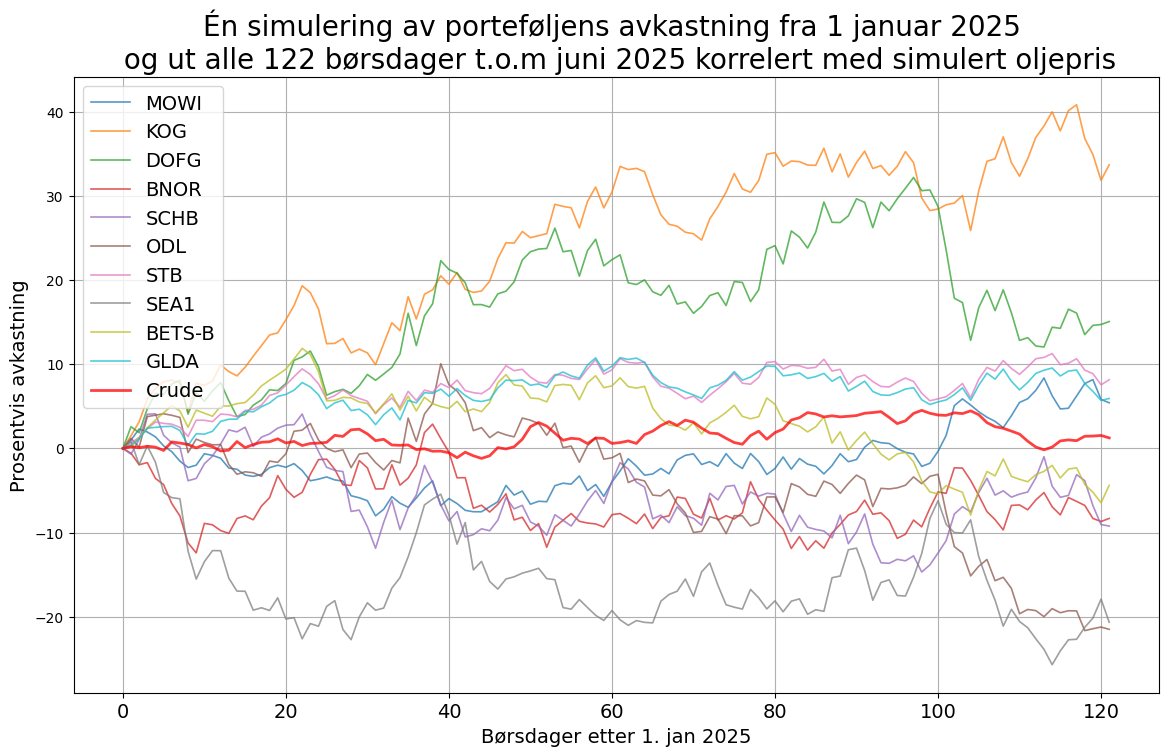

In [544]:
time = range(T)
i = 969
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(time, 100*(paths[ticker][i]/paths[ticker][i][0] - 1), label=ticker, lw=1.2, alpha=0.75)

plt.plot(time, 100*(C_t[i] / C_t[0] - 1), label='Crude', lw=2, alpha=0.75, color='red')

plt.legend(fontsize=14)
plt.title(f'Én simulering av porteføljens avkastning fra 1 januar 2025 \n og ut alle 122 børsdager t.o.m juni 2025 korrelert med simulert oljepris', fontsize=20)
plt.grid()
plt.xlabel("Børsdager etter 1. jan 2025", fontsize=14)
plt.ylabel("Prosentvis avkastning", fontsize=14)
plt.xticks(fontsize=14)
plt.show()

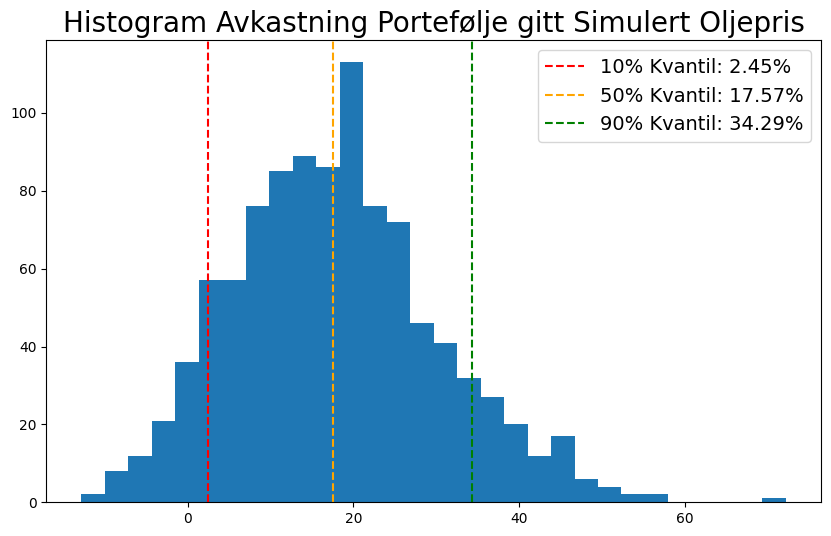

UPI: 1.7835743438993725


In [531]:
avkastninger = {ticker: np.zeros(N) for ticker in tickers}

for ticker in tickers:
    r = 100*(paths[ticker][:, T-1] / paths[ticker][:, 0] - 1)
    avkastninger[ticker] = r

avkastninger_portfolio = []

for i in range(N):
    avkast = 0
    for ticker in tickers:
        avkast += avkastninger[ticker][i] * portfolio[ticker]

    avkastninger_portfolio.append(avkast)

mu_r = np.mean(avkastninger_portfolio)
sd_r = np.sqrt(np.var(avkastninger_portfolio))
_10q = np.sort(avkastninger_portfolio)[int((N-1)*0.1 + 1)]
_90q = np.sort(avkastninger_portfolio)[int((N-1)*0.9 + 1)]
_50q = np.sort(avkastninger_portfolio)[int((N-1)*0.5 + 1)]

plt.figure(figsize=(10, 6))
plt.hist(avkastninger_portfolio, 30)
plt.title("Histogram Avkastning Portefølje gitt Simulert Oljepris", fontsize=20)
plt.axvline(_10q, color="red", linestyle="--", label=f"10% Kvantil: {round(_10q, 2)}%")
plt.axvline(_50q, color="orange", linestyle="--", label=f"50% Kvantil: {round(_50q, 2)}%")
plt.axvline(_90q, color="green", linestyle="--", label=f"90% Kvantil: {round(_90q, 2)}%")
plt.legend(fontsize=14)

plt.show()
print(f'UPI: {( _90q - abs(_10q))/mu_r}')

## Monte Carlo Simulering av Porteføljen gitt oljeprisens bevegelse med økende volatilitet opp til 100%

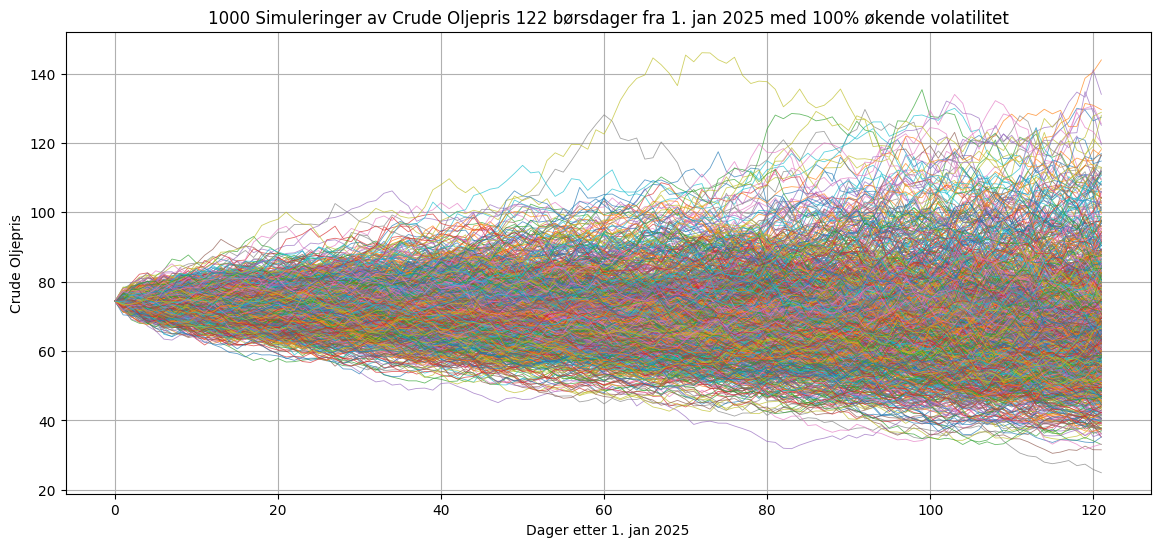

In [546]:
C_t = np.zeros((N,T))
C_t[:, 0] = np.log(crude.iloc[-1]['Close'])
d_sigma = np.power(2, 1/T) - 1
sigma_sigma = (d_sigma) / 4

for t in range(1, T):
    Z = np.random.normal(size=N)
    dW = np.sqrt(dt)*Z
    

    dX = float(crude_params['kappa']) * (float(crude_params['mu']) - C_t[:, t-1]) * dt + np.exp(np.random.normal(d_sigma, sigma_sigma) * t) * float(crude_params['sigma']) * dW
    C_t[:, t] = C_t[:, t-1] + dX


plt.figure(figsize=(14, 6))
for n in range(N):
    plt.plot(time, np.exp(C_t[n]), lw=0.6, alpha=0.7)

plt.title("1000 Simuleringer av Crude Oljepris 122 børsdager fra 1. jan 2025 med 100% økende volatilitet")
plt.grid()
plt.xlabel("Dager etter 1. jan 2025")
plt.ylabel("Crude Oljepris")
plt.show()

In [568]:
paths = {ticker: np.zeros((N, T)) for ticker in tickers}

for ticker in tickers:
    paths[ticker][:, 0] = df.iloc[-1][ticker]

for t in range(1, T):
    Z = np.random.normal(size=(N, len(tickers)))
    L = np.linalg.cholesky(corr_mtx)
    Z = np.dot(L, Z.T).T

    for i, ticker in enumerate(tickers):
        dW = np.sqrt(dt) * Z[:, i]

        crude_correlation = float(crude_corr[ticker])
        corr_c = np.array([
            [1, crude_correlation],
            [crude_correlation, 1]
        ])
        L_c = np.linalg.cholesky(corr_c)

        crude_returns = 100 * (C_t[:, t] - C_t[:, t-1]) / C_t[:, t-1] if t > 1 else np.zeros(N)

        # Combine dW and crude returns for transformation
        adjusted_factors = np.vstack([dW, crude_returns]).T
        dW_adjusted = np.dot(adjusted_factors, L_c).T[0]

        # Vectorized jump sizes
        upward_jumps = np.random.poisson(params[f'{ticker}:l_jump'] * params[f'{ticker}:p'] * dt, N)
        downward_jumps = np.random.poisson(params[f'{ticker}:l_jump'] * (1 - params[f'{ticker}:p']) * dt, N)
        jump_sizes = (
            upward_jumps * np.random.exponential(1/params[f'{ticker}:eta_1'], N)
            - downward_jumps * np.random.exponential(1/params[f'{ticker}:eta_2'], N)
        )

        W = 1 + float(params[f'{ticker}:mu']) * dt + float(params[f'{ticker}:sigma']) * dW_adjusted + jump_sizes 

        # Update stock price
        paths[ticker][:, t] = np.array(paths[ticker][:, t-1]) * W

C:\Users\naths\AppData\Local\Temp\ipykernel_27028\3050359671.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  crude_correlation = float(crude_corr[ticker])
C:\Users\naths\AppData\Local\Temp\ipykernel_27028\3050359671.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  W = 1 + float(params[f'{ticker}:mu']) * dt + float(params[f'{ticker}:sigma']) * dW_adjusted + jump_sizes


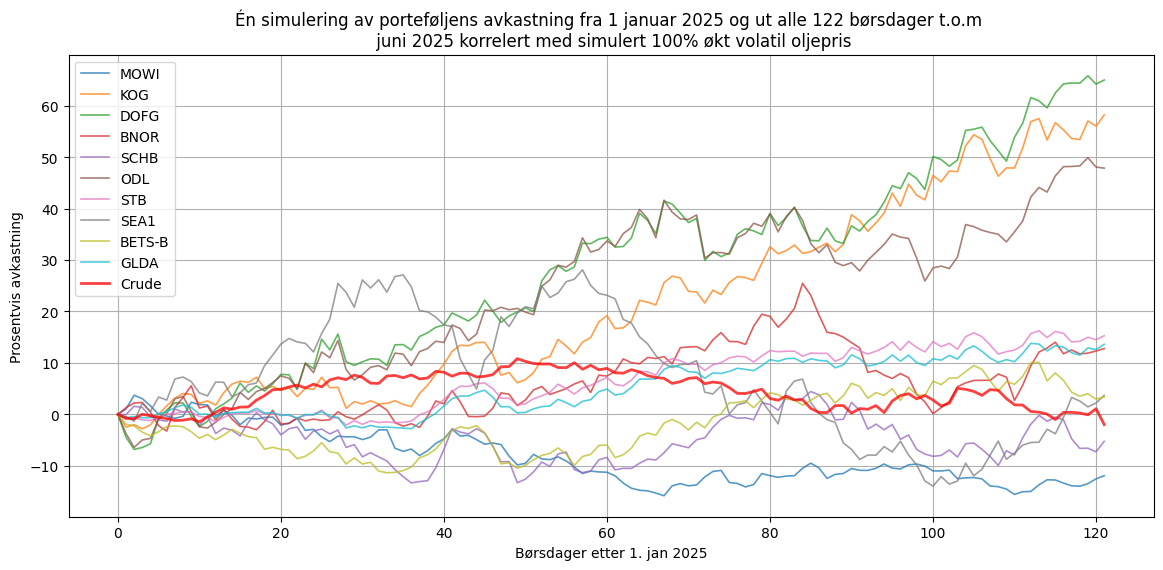

In [569]:
time = range(T)
i = 189
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(time, 100*(paths[ticker][i]/paths[ticker][i][0] - 1), label=ticker, lw=1.2, alpha=0.75)

plt.plot(time, 100*(C_t[i] / C_t[0] - 1), label='Crude', lw=2, alpha=0.75, color='red')

plt.legend()
plt.title(f'Én simulering av porteføljens avkastning fra 1 januar 2025 og ut alle 122 børsdager t.o.m \n juni 2025 korrelert med simulert 100% økt volatil oljepris')
plt.grid()
plt.xlabel("Børsdager etter 1. jan 2025")
plt.ylabel("Prosentvis avkastning")
plt.show()

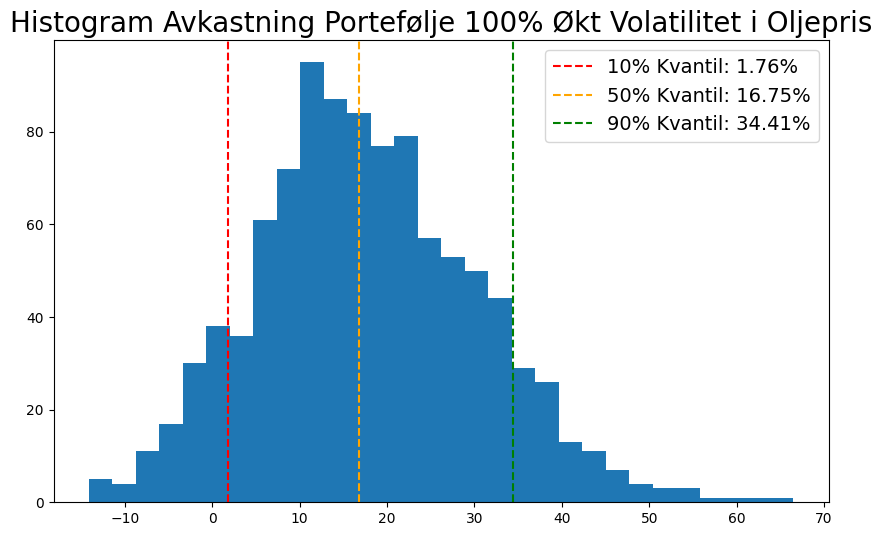

UPI: 1.8413904143837732


In [552]:
avkastninger = {ticker: np.zeros(N) for ticker in tickers}

for ticker in tickers:
    r = 100*(paths[ticker][:, T-1] / paths[ticker][:, 0] - 1)
    avkastninger[ticker] = r

avkastninger_portfolio = []

for i in range(N):
    avkast = 0
    for ticker in tickers:
        avkast += avkastninger[ticker][i] * portfolio[ticker]

    avkastninger_portfolio.append(avkast)

mu_r = np.mean(avkastninger_portfolio)
sd_r = np.sqrt(np.var(avkastninger_portfolio))
_10q = np.sort(avkastninger_portfolio)[int((N-1)*0.1 + 1)]
_90q = np.sort(avkastninger_portfolio)[int((N-1)*0.9 + 1)]
_50q = np.sort(avkastninger_portfolio)[int((N-1)*0.5 + 1)]

plt.figure(figsize=(10, 6))
plt.hist(avkastninger_portfolio, 30)
plt.title("Histogram Avkastning Portefølje 100% Økt Volatilitet i Oljepris", fontsize=20)
plt.axvline(_10q, color="red", linestyle="--", label=f"10% Kvantil: {round(_10q, 2)}%")
plt.axvline(_50q, color="orange", linestyle="--", label=f"50% Kvantil: {round(_50q, 2)}%")
plt.axvline(_90q, color="green", linestyle="--", label=f"90% Kvantil: {round(_90q, 2)}%")
plt.legend(fontsize=14)

plt.show()
print(f'UPI: {( _90q - abs(_10q))/mu_r}')

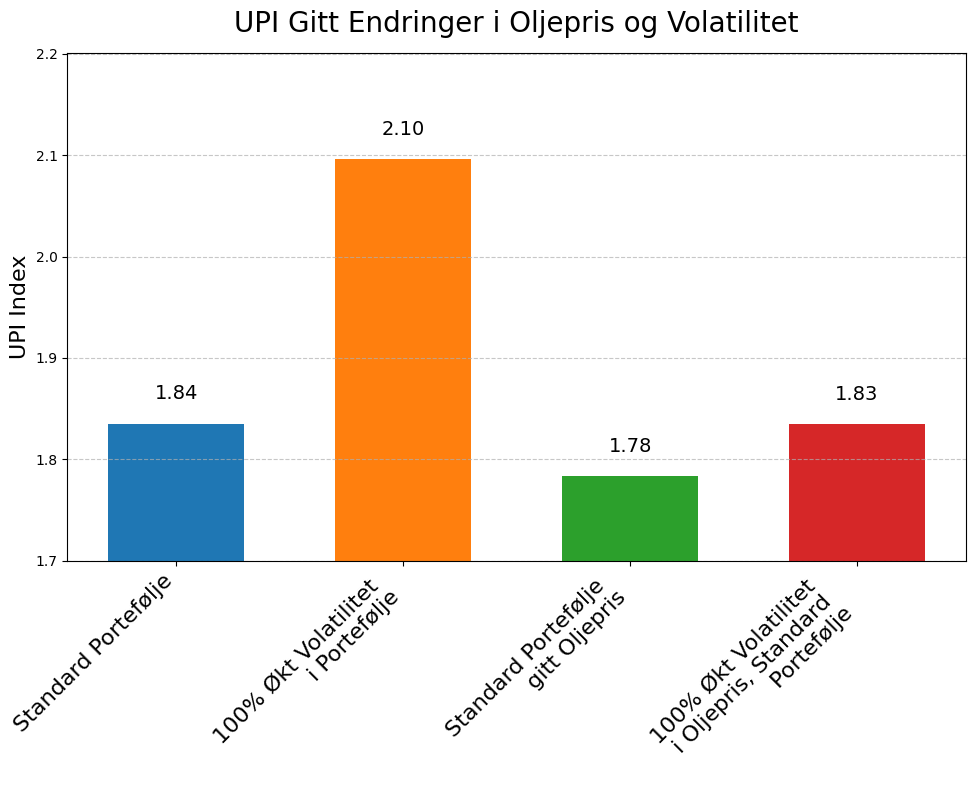

In [533]:
UPI = {
    'Standard Portefølje': 1.8352167470521017,
    '100% Økt Volatilitet \n i Portefølje': 2.096180383711732,
    'Standard Portefølje \n gitt Oljepris': 1.7835743438993725,
    '100% Økt Volatilitet \n i Oljepris, Standard \n Portefølje': 1.8346969274461813
}

fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.bar(UPI.keys(), UPI.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], width=0.6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
            ha='center', va='bottom', fontsize=14)

# Format axes and title
ax.set_xticks(range(len(UPI.keys())))
ax.set_xticklabels(UPI.keys(), rotation=45, ha='right', fontsize=16)
ax.set_title("UPI Gitt Endringer i Oljepris og Volatilitet", fontsize=20, pad=15)
ax.set_ylabel("UPI Index", fontsize=16)
ax.set_ylim(bottom=1.7)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display plot
plt.tight_layout()
plt.show()

In [580]:
weights = {ticker: 0 for ticker in tickers}

for n in range(N):
    curr_max = -np.inf
    curr_ticker = ''

    for ticker in tickers:
        avkast = 100*(paths[ticker][n, :][-1] / paths[ticker][n, :][0] - 1)

        sigma = np.std(np.log(paths[ticker][n, :] / paths[ticker][n, :][0]))
        if avkast > curr_max:
            curr_max = avkast/sigma
            curr_ticker = ticker

    weights[curr_ticker] += 1

for ticker in tickers:
    weights[ticker] /= N / 100

weights

{'MOWI': 43.7,
 'KOG': 54.7,
 'DOFG': 0.5,
 'BNOR': 0.5,
 'SCHB': 0.0,
 'ODL': 0.0,
 'STB': 0.0,
 'SEA1': 0.5,
 'BETS-B': 0.0,
 'GLDA': 0.1}